# Cas Kaggle: Predicció del Guanyador de Partides d’Escacs (Lichess)

**Autors:** Naroa Sarrià (1706167), Inés Gómez (1704361)  
**Assignatura:** Aprenentatge Computacional – UAB (2025)

**Dataset original:** https://www.kaggle.com/datasnaek/chess  
**Repositori GitHub:** https://github.com/NIU1706167/CasKaggle-Chess


## 4. Model Selection i Cross Validation

### Model previ a començar la partida

In [1]:
import pandas as pd
import seaborn as sns
from metric_selection import metriques, grafiques, curva_ROC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold
import numpy as np

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv("games_preprocessed.csv")
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,...,black_win_streak,black_loss_streak,diff_win_streak,diff_loss_streak,opening_group_A,opening_group_B,opening_group_C,opening_group_D,opening_group_E,num_plies
0,hmdl0w8w,-2.056863,2013-08-17 20:33:53.173,1.376772e+12,19,resign,1,12+8,julito,899,...,-0.353240,-0.423498,0.005286,0.011275,-0.491017,-0.592896,1.260727,-0.393824,-0.160738,19
1,6trard8c,0.486177,2013-08-17 20:37:48.314,1.376772e+12,43,mate,1,7+15,kiii,1500,...,-0.353240,-0.423498,0.005286,0.393599,-0.491017,1.686636,-0.793193,-0.393824,-0.160738,43
2,2hf0bf3b,0.486177,2013-08-19 16:38:07.783,1.376931e+12,27,resign,1,10+20,goldenfork,1381,...,0.107369,-0.423498,-0.314569,0.011275,-0.491017,-0.592896,1.260727,-0.393824,-0.160738,27
3,63x6m6fx,-2.056863,2013-08-19 17:23:45.599,1.376934e+12,84,resign,0,10+8,kiii,1170,...,-0.353240,-0.423498,0.005286,0.393599,-0.491017,-0.592896,1.260727,-0.393824,-0.160738,84
4,rk7l19ti,0.486177,2013-08-19 20:56:29.445,1.376947e+12,51,mate,1,20+15,kiii,1348,...,-0.353240,-0.423498,0.005286,0.775923,-0.491017,1.686636,-0.793193,-0.393824,-0.160738,51


Fem un primer model amb les dades que sabem prèviament al començament de la partida

Logistic Regression
              precision    recall  f1-score   support

           0       0.65      0.58      0.61      1783
           1       0.65      0.72      0.68      1981

    accuracy                           0.65      3764
   macro avg       0.65      0.65      0.65      3764
weighted avg       0.65      0.65      0.65      3764

Accuracy: 0.6506376195536663


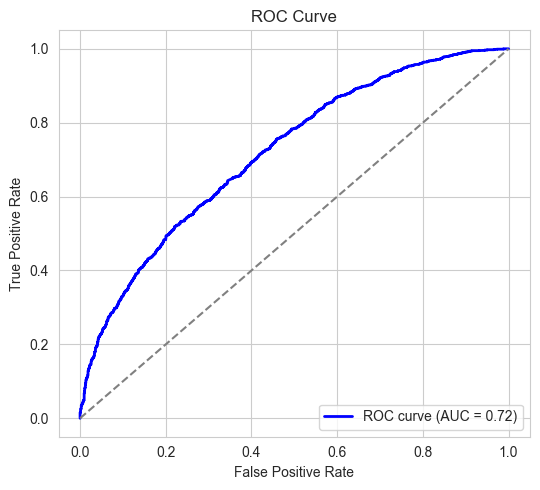

In [3]:
#Model sense les noves variables
explanatory_variables = ['white_rating', 'black_rating']
target_variable = "winner"

X = df[explanatory_variables]
y = df[target_variable]  # 1 = white, 0 = black

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train, y_train)

print("Logistic Regression")
metriques(log_model,X_test,y_test)
curva_ROC(log_model,X_test,y_test)

Gradient Boosting
              precision    recall  f1-score   support

           0       0.64      0.59      0.61      1783
           1       0.66      0.71      0.68      1981

    accuracy                           0.65      3764
   macro avg       0.65      0.65      0.65      3764
weighted avg       0.65      0.65      0.65      3764

Accuracy: 0.6503719447396387


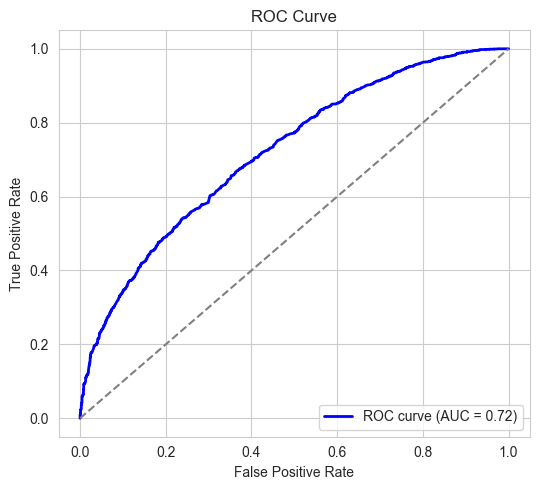

In [4]:
# previ també
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

print("Gradient Boosting")
metriques(gb_model,X_test,y_test)
curva_ROC(gb_model,X_test,y_test)

Gradient Boosting
              precision    recall  f1-score   support

           0       0.63      0.59      0.61      1783
           1       0.65      0.70      0.67      1981

    accuracy                           0.64      3764
   macro avg       0.64      0.64      0.64      3764
weighted avg       0.64      0.64      0.64      3764

Accuracy: 0.6447927736450585


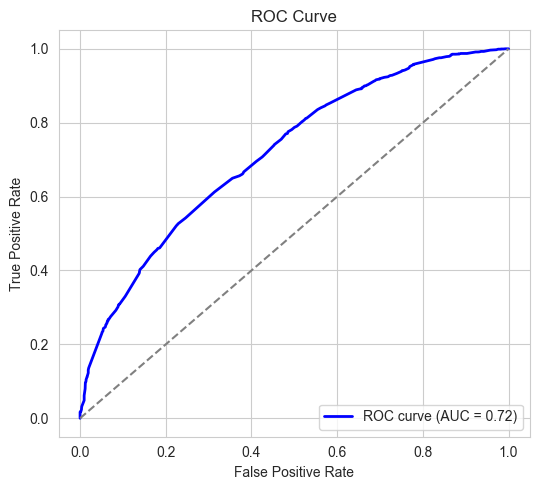

In [5]:
explanatory_variables = ['diff_rating']
target_variable = "winner"
X = df[explanatory_variables]
y = df[target_variable]  # 1 = white, 0 = black
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

print("Gradient Boosting")
metriques(gb_model,X_test,y_test)
curva_ROC(gb_model,X_test,y_test)

COMENTARIO DE QUE DA LO MISMO CON DIFF RATING QUE CON LOS RATINGS POR SEPARADO

Afegim les variables creades

Logistic Regression
              precision    recall  f1-score   support

           0       0.65      0.61      0.63      1783
           1       0.67      0.70      0.68      1981

    accuracy                           0.66      3764
   macro avg       0.66      0.66      0.66      3764
weighted avg       0.66      0.66      0.66      3764

Accuracy: 0.6596705632306057


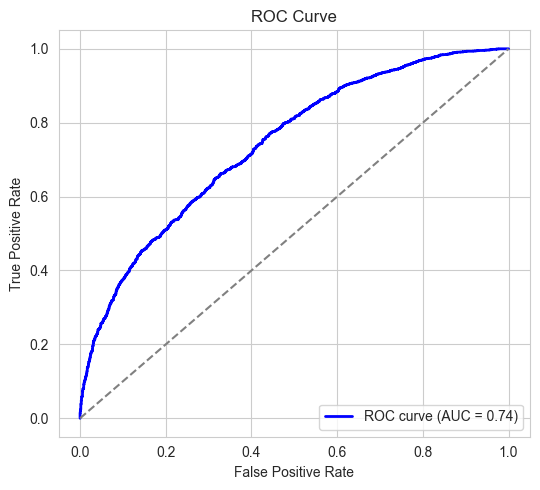

In [6]:
#Model amb només la diff_rating
explanatory_variables = ['diff_rating', 
                        'diff_global_winrate',
                        'vs_white_winrate', 'vs_prev_matches',
                        'diff_win_streak',
                        'diff_loss_streak']
target_variable = "winner"

X = df[explanatory_variables]
y = df[target_variable]  # 1 = white, 0 = black

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train, y_train)

print("Logistic Regression")
metriques(log_model,X_test,y_test)
curva_ROC(log_model,X_test,y_test)

SVM:
              precision    recall  f1-score   support

           0       0.67      0.58      0.62      1783
           1       0.66      0.74      0.70      1981

    accuracy                           0.67      3764
   macro avg       0.67      0.66      0.66      3764
weighted avg       0.67      0.67      0.66      3764

Accuracy: 0.6665781083953242


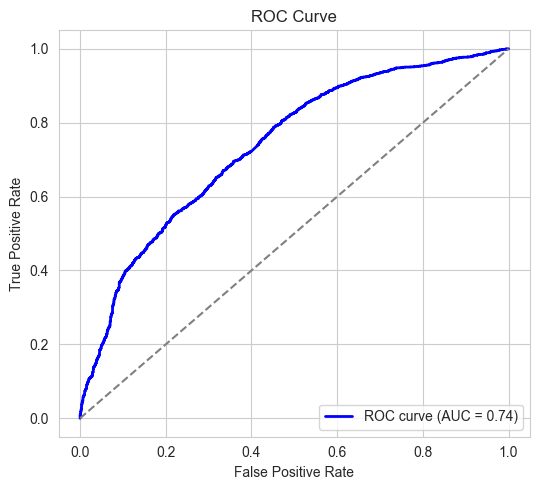

In [7]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

print("SVM:")
metriques(svm_model,X_test,y_test)
curva_ROC(svm_model,X_test,y_test)

Gradient Boosting
              precision    recall  f1-score   support

           0       0.65      0.62      0.64      1783
           1       0.67      0.70      0.69      1981

    accuracy                           0.66      3764
   macro avg       0.66      0.66      0.66      3764
weighted avg       0.66      0.66      0.66      3764

Accuracy: 0.6628586609989373


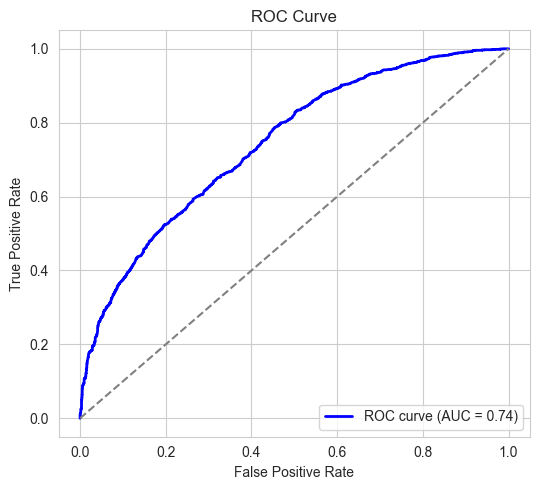

In [8]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

print("Gradient Boosting")
metriques(gb_model,X_test,y_test)
curva_ROC(gb_model,X_test,y_test)

Random Forest
              precision    recall  f1-score   support

           0       0.60      0.59      0.60      1783
           1       0.64      0.65      0.64      1981

    accuracy                           0.62      3764
   macro avg       0.62      0.62      0.62      3764
weighted avg       0.62      0.62      0.62      3764

Accuracy: 0.6216790648246546


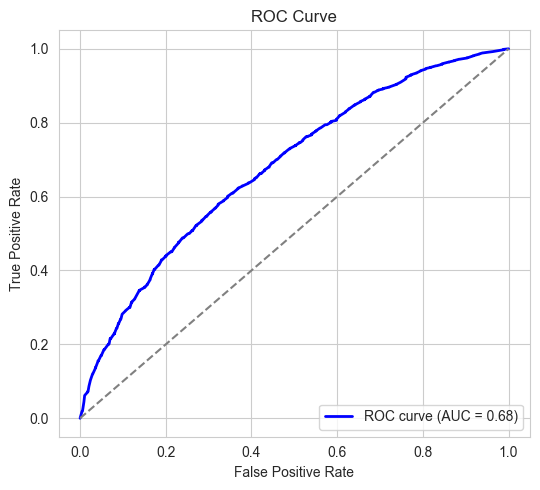

In [9]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

print("Random Forest")
metriques(rf_model,X_test,y_test)
curva_ROC(rf_model,X_test,y_test)

## Crossvalidation per la cerca d'hiperparàmetres

In [10]:
cv = KFold(n_splits=5, shuffle=True, random_state=1)

c:\Users\nsarr\Desktop\UNI\3r\semestre1\APC\.venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 10 is smaller than n_iter=20. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Logistic Regression params: {'solver': 'liblinear', 'penalty': 'l1', 'C': 1}


              precision    recall  f1-score   support

           0       0.65      0.61      0.63      1783
           1       0.67      0.70      0.68      1981

    accuracy                           0.66      3764
   macro avg       0.66      0.66      0.66      3764
weighted avg       0.66      0.66      0.66      3764

Accuracy: 0.6596705632306057


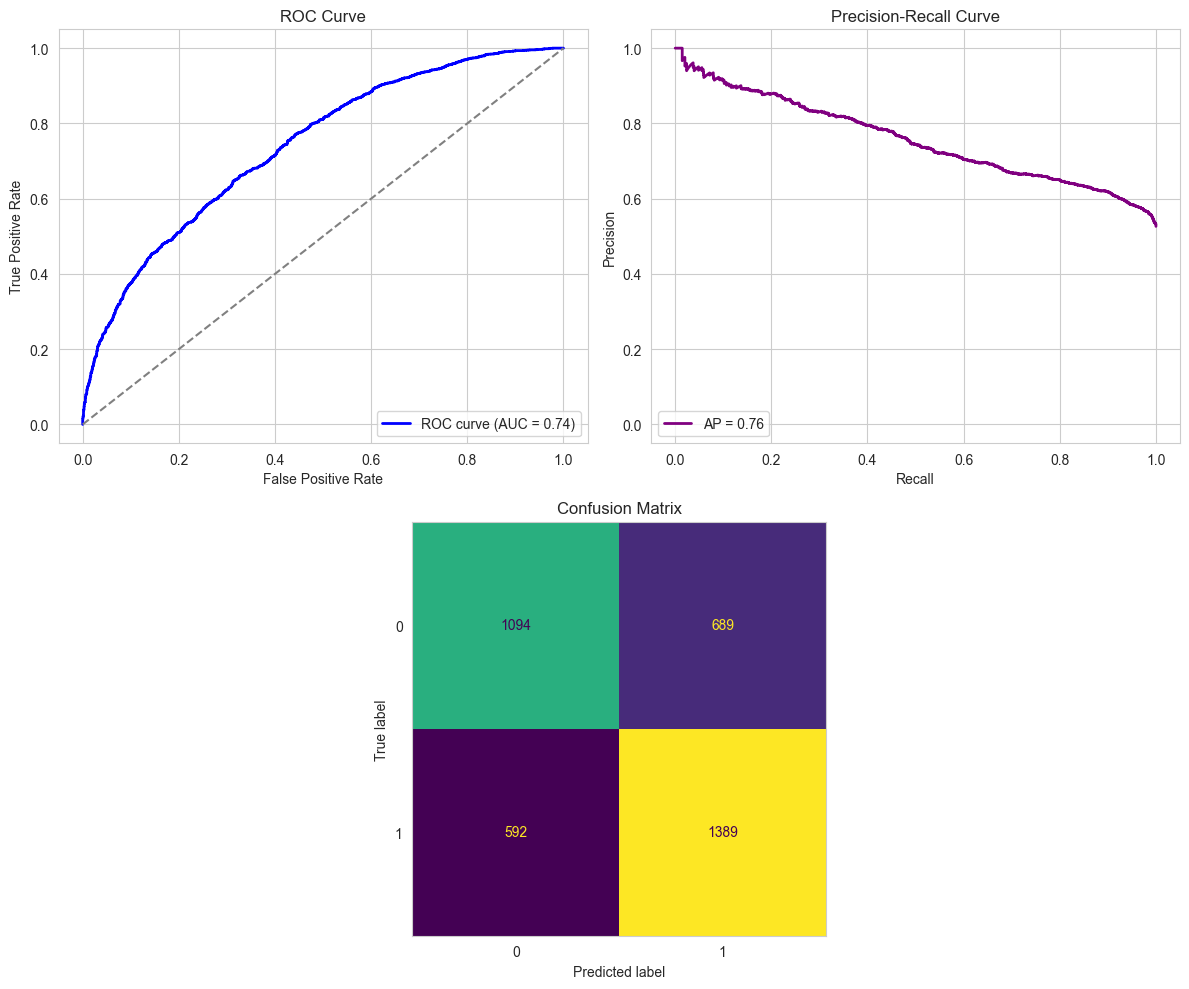

In [11]:
log_reg = LogisticRegression(max_iter=1000)
param_log = {"C": [0.01, 0.1, 1, 10, 100], "penalty": ["l1","l2"], "solver": ["liblinear"]}

grid_log = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_log,
    n_iter=20,          # número de combinaciones aleatorias a probar
    scoring="accuracy", 
    cv=cv,
    n_jobs=-1,
    verbose=2
)
grid_log.fit(X_train, y_train)

print("Best Logistic Regression params:", grid_log.best_params_)
print("\n")
metriques(grid_log,X_test,y_test)
grafiques(grid_log,X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best SVM params: {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}
Best CV score: 0.6726220105738896


              precision    recall  f1-score   support

           0       0.67      0.58      0.62      1783
           1       0.66      0.74      0.70      1981

    accuracy                           0.67      3764
   macro avg       0.67      0.66      0.66      3764
weighted avg       0.67      0.67      0.66      3764

Accuracy: 0.6660467587672688


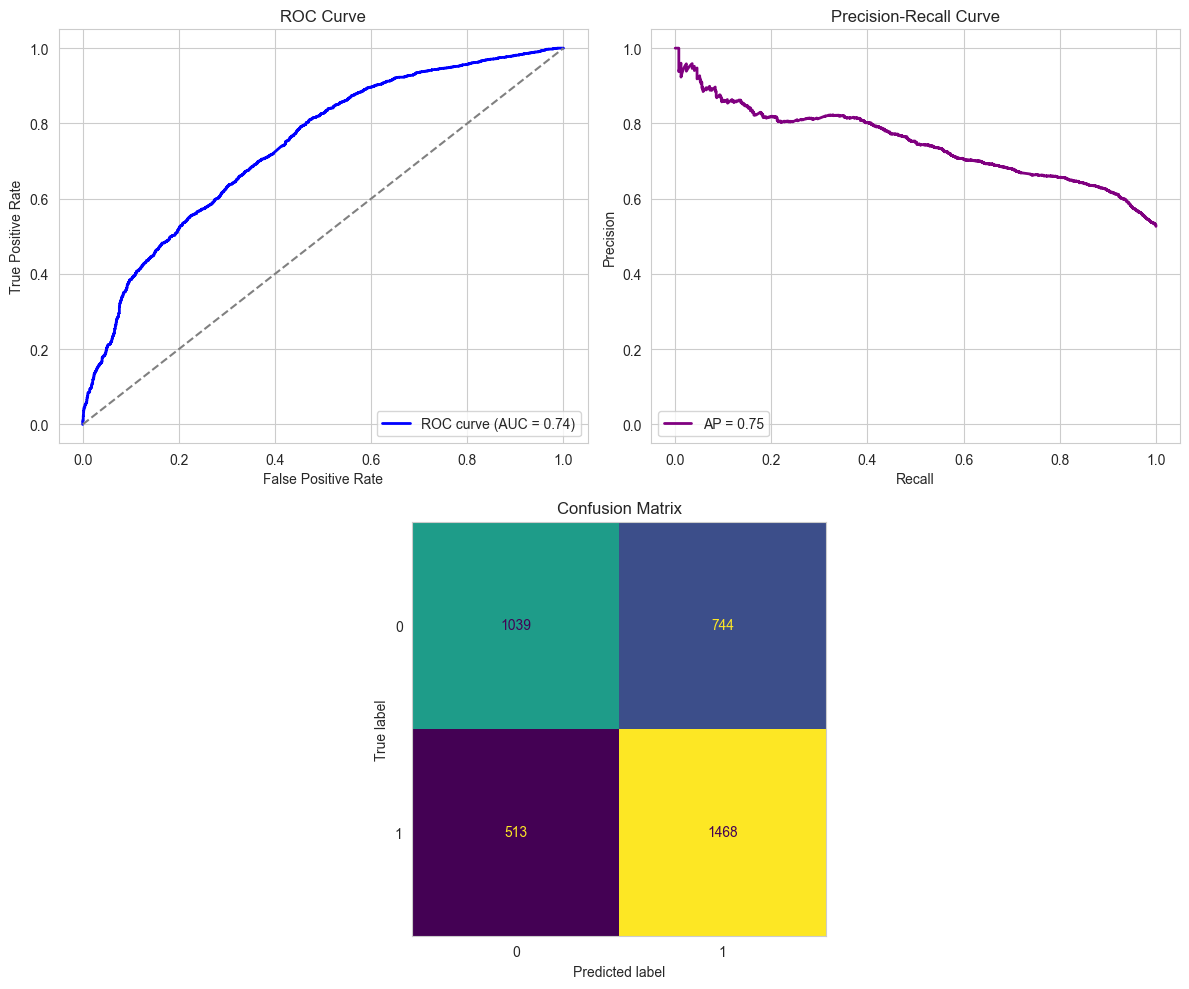

In [12]:
#CROSS VALIDATION DE SVM
# SVM
svc = SVC(probability=True)
param_svc = {"C": [0.01, 0.1, 1, 10, 100], "kernel": ["linear", "rbf"], "gamma": np.logspace(-6, 2, num=9).tolist()}

grid_svc = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_svc,
    n_iter=20,           # número de combinaciones aleatorias a probar
    scoring="accuracy", 
    cv=cv,
    n_jobs=-1,
    verbose=2)
grid_svc.fit(X_train, y_train)

print("Best SVM params:", grid_svc.best_params_)
print("Best CV score:", grid_svc.best_score_)
print("\n")
metriques(grid_svc,X_test,y_test)
grafiques(grid_svc,X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores hiperparámetros:
{'subsample': 0.7, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 2, 'learning_rate': 0.05}

Gradient Boosting (RandomizedSearchCV)
              precision    recall  f1-score   support

           0       0.65      0.61      0.63      1783
           1       0.67      0.71      0.69      1981

    accuracy                           0.66      3764
   macro avg       0.66      0.66      0.66      3764
weighted avg       0.66      0.66      0.66      3764

Accuracy: 0.6620616365568545


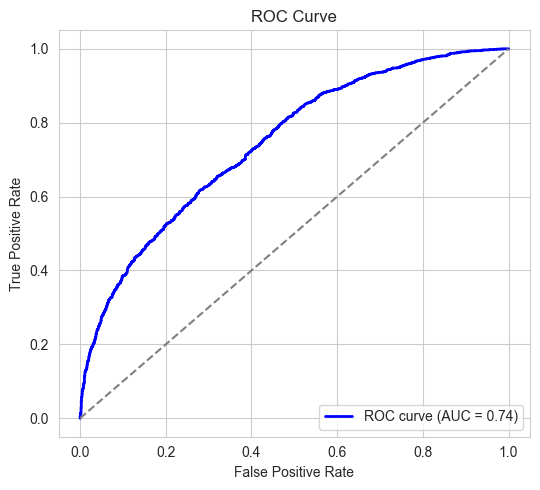

In [13]:
gb_model = GradientBoostingClassifier(random_state=42)
param_dist = {
    'n_estimators': [100, 200, 300, 500, 800, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.3],
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'max_features': ['sqrt', 'log2', None],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=20,         
    scoring="accuracy", 
    cv=cv,
    n_jobs=-1,
    verbose=2
)

random_search.fit(X_train, y_train)

# Mejores hiperparámetros
print("Mejores hiperparámetros:")
print(random_search.best_params_)

# Evaluar mejor modelo
best_gb = random_search.best_estimator_
print("\nGradient Boosting (RandomizedSearchCV)")
metriques(best_gb, X_test, y_test)
curva_ROC(best_gb, X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores hiperparámetros Random Forest:
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': False}

Random Forest (RandomizedSearchCV)
              precision    recall  f1-score   support

           0       0.65      0.63      0.64      1783
           1       0.68      0.70      0.69      1981

    accuracy                           0.66      3764
   macro avg       0.66      0.66      0.66      3764
weighted avg       0.66      0.66      0.66      3764

Accuracy: 0.6641870350690755


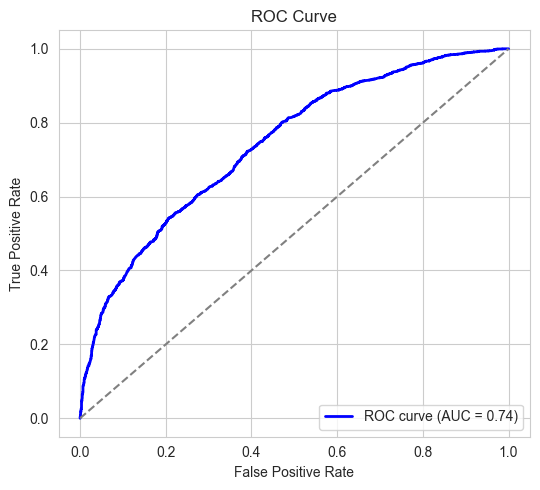

In [14]:
rf_model = RandomForestClassifier(random_state=42)

param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True, False]
}

random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,           
    scoring="accuracy", 
    cv=cv,
    n_jobs=-1,
    verbose=2
)

random_search_rf.fit(X_train, y_train)

print("Mejores hiperparámetros Random Forest:")
print(random_search_rf.best_params_)

best_rf = random_search_rf.best_estimator_

print("\nRandom Forest (RandomizedSearchCV)")
metriques(best_rf, X_test, y_test)
curva_ROC(best_rf, X_test, y_test)